# Анализ рынка видеоигр

**Имеются:**  исторические данные о продажах игр в период с 1980 по 2016 года, оценки пользователей и экспертов, жанры и платформы из открытых источников.

**Необходимо:** провести первичный и статистический анализ рынка видеоигр, выявить определяющие успешность игры закономерности (это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в сфере продаж видеоигр)


## 1. Изучение общей информации

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns 
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
path1 = '/datasets/games.csv'
path2 = 'C:\\Users\\admin\\Desktop\\analys\\games-stats\\games.csv'

if os.path.exists(path1):
    df = pd.read_csv(path1)
elif os.path.exists(path2):
    df = pd.read_csv(path2)

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Что по пропускам?

In [8]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
100*df.isna().mean() # Доля пропусков в процентах

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [10]:
df.duplicated().sum() # Проверка на дубликаты

0

Сколько игр в датасете?

In [11]:
len(df.Name.unique())

11560

Взглянем предварительно на топы самых популярных значений.

In [12]:
df.Platform.value_counts().head() # 5 самых популярных платформ

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: Platform, dtype: int64

In [13]:
df.Year_of_Release.value_counts().head() # 5 годов с самыми частыми релизами

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: Year_of_Release, dtype: int64

In [14]:
df.Name.value_counts().head() # 5 игр с самыми частыми релизами

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
FIFA 14                         9
Ratatouille                     9
Madden NFL 07                   9
Name: Name, dtype: int64

Учитывая, что у Need for Speed: Most Wanted был одноименный ремейк, полагаю, это и вывело игру в топ по релизам.

Какой временной диапазон охватываем?

In [15]:
print('Временной диапазон по датасету составляет', 
      df.Year_of_Release.max()-df.Year_of_Release.min(),
      'лет: с', df.Year_of_Release.min(),
      'по', df.Year_of_Release.max(), 'года.')

Временной диапазон по датасету составляет 36.0 лет: с 1980.0 по 2016.0 года.


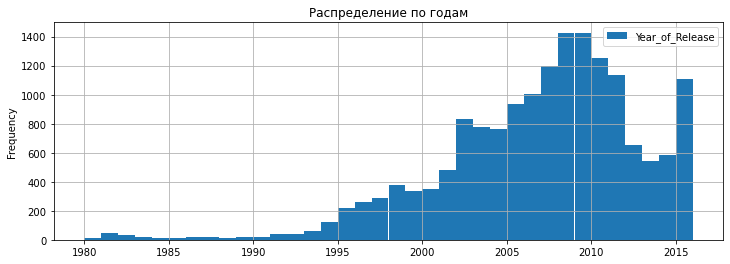

In [16]:
df.Year_of_Release.sort_values().plot(kind='hist',    # Выведем гистограмму по годам
                                      bins=36, grid=True, 
                                      figsize=(12, 4), 
                                      title='Распределение по годам', 
                                      legend=True);

In [17]:
df.Genre.value_counts().head() # 5 самых популярных жанров

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: Genre, dtype: int64

In [18]:
df.Rating.value_counts() # Возрастные рейтинг по мере популярности в порядке убывания

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Небольшое пояснение с Википедии в порядке убывания:
- «E» («Everyone») — «Для всех»: Игра подходит для лиц от 6 лет
- «T» («Teen») — «Подросткам»: от 13 лет
- «M» («Mature») — «Для взрослых»: от 17 лет
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»: до 3 лет
- "K-A" ("Kids to Adults"): первоначальная версия «E»
- «RP» («Rating Pending») — «Рейтинг ожидается». Для еще невыпущенных проектов.
- «AO» («Adults Only 18+») — «Только для взрослых старше 18 лет»

### Вывод

В нашем распоряжении датасет об 11.5 тыс. видеоиграх: данные по продажам в трех регионах (Северная Америка, Евросоюз, Япония) и других, их возрастному рейтингу, журналистским и пользовательским оценкам. 

Нам необходимо выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Мы планируем кампанию на 2017 год.

Первое, на что бросаются глаза - объем датасета: в нем есть игры аж с 1890 года. При составлении плана на 2017 года, анализ старых игр может не дать нам полезного результата. На это стоит обратить внимание.

В колонках с продажами много нулей - это может быть оправдано. В колонках рейтинга и оценок - много NaN'ов - нужно понять их причину. 

Датасет очевидно необходимо обработать: пропуски, именования столбцов, нулевые значения, изменить типы данных некоторых столбцов, просчитать новые метрики.

## 2. Предобработка данных

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Именования столбцов.

Приведем к нижнему регистру.

In [20]:
df.set_axis(['name','platform','year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], axis = 'columns', inplace = True) 

In [21]:
df.head(1) # Проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


### Приведем данные к нужным типам.

Колонку **year_of_release** не вижу смысла переводить в datetime: достаточно избавиться от NaN-ов и преобразовать в int.

In [22]:
len(df.query('year_of_release=="NaN"')) # Сколько всего пропусков?

269

А в процентах?

In [23]:
print(round(100*len(df.query('year_of_release=="NaN"'))/len(df), 2), '%')

1.61 %


In [24]:
df.query('year_of_release=="NaN"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Основываясь на задаче проекта, я считаю возможным удалить эти полтора процента, как не несущие сильного влияния на данные. Природу их появления считаю случайной - если взглянуть на срез визуально, то не наблюдаю существенных никаких отличий от всего датафрейма ни по одному из столбцов.

In [25]:
df = df.drop(df.query('year_of_release=="NaN"').index)

In [26]:
df['year_of_release'] = df['year_of_release'].astype('int')

Два пропуска в графе "Названия":

In [27]:
df[df['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [29]:
df=df.drop([652, 14022]).reset_index() # 2 строчки можно удалить

Пропусков в графах **"critic_score"** и **"user_score"** - около половины. Их не стоит заменять нулями, т.к. в будущем при составлении рейтингов, они очень сильно исказят результаты. 
Помимо прочего, **"user_score"** имеет много значений "tbd" - to be done, т.е. оценки ещё нет. Заменим на NaN.

In [30]:
df['user_score'] = df['user_score'].replace("tbd", np.NaN)

**"user_score"** имеет тип данных - object, а **"critic_score"** - float. Преобразуем первый в float (т.к. оценки дробью), а "critic_score" в int (т.к. оценки в процентах).

In [31]:
df['critic_score'] = df['critic_score'].astype('int', errors='ignore')
df['user_score'] = df['user_score'].astype('float', errors='ignore')

In [32]:
df.info() # Проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16442 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int32  
 4   genre            16442 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7981 non-null   float64
 10  user_score       7461 non-null   float64
 11  rating           9766 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


В колонке **rating** ничего не стоит делать с пропусками - очевидно, мы не сможем их заменить сами. 

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [93]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [34]:
df.head() 

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [35]:
len(df.query('critic_score != critic_score & user_score != user_score & rating != rating'))

6582

In [36]:
len(df.query('critic_score != critic_score or user_score != user_score or rating != rating'))

9620

In [37]:
df.query('critic_score != critic_score & user_score != user_score & rating != rating')['platform'].value_counts()

PS      981
DS      864
PS2     671
PSP     656
PS3     361
N64     316
Wii     306
GBA     297
3DS     288
PSV     279
SNES    239
X360    196
SAT     173
PC      156
PS4     125
2600    116
NES      98
GB       97
XB       85
GC       85
XOne     53
WiiU     42
DC       38
GEN      29
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

## 3. Исследовательский анализ данных.

Напомним, сколько игр выпускалось в разные годы.

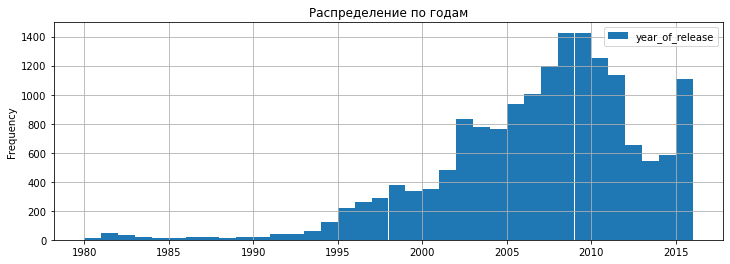

In [38]:
df.year_of_release.sort_values().plot(kind='hist',    
                                      bins=36, grid=True, 
                                      figsize=(12, 4), 
                                      title='Распределение по годам', 
                                      legend=True);

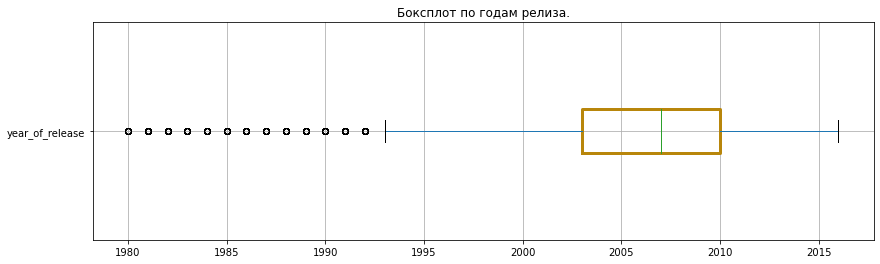

In [39]:
boxprops = dict(linestyle='-', linewidth=3, color='darkgoldenrod')
df.boxplot(column='year_of_release', vert=False, figsize=(14, 4),
           widths=0.2, boxprops=boxprops).set_title('Боксплот по годам релиза.');

Виден возрастающий тренд до 2008 года, а основная масса игр в датасете датирована в промежутке - с 1993-1995 года и до наших дней. 

In [40]:
sales = df.groupby('year_of_release')[['all_sales']].sum()
number = df.groupby('year_of_release')[['name']].count()
df1 = sales.merge(number, on='year_of_release')
df1.columns = ['Продажи игр, млн.', 'Количество игр']

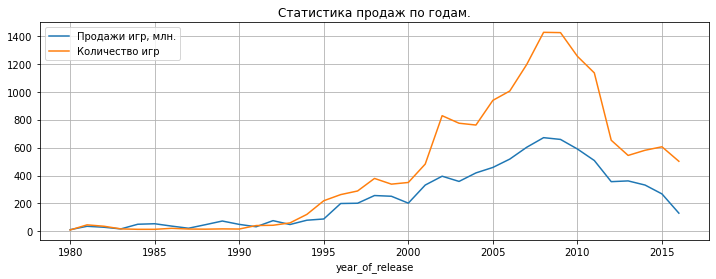

In [41]:
df1.plot(grid=True, figsize=(12, 4)).set_title('Статистика продаж по годам.');

Интересно, что после 2008 года тренд - нисходящий. Это, возможно, связано с относительной монополией консолей (из крупных к тому моменту оставались PC, Xbox, PS, Nintendo), активным развитием и популярностью интернета (а с ним пиратства и бесплатных и условно-бесплатных игр), развитием технологий (из-за чего игры стали создаваться дольше и сложнее, а релизы - реже).

Заметный перелом так же наблюдается с 2000 года - график в обоих случае стремится ввысь. Думаю, именно начиная с этого года, стоит анализировать данные по играм.

In [42]:
df1

,"Продажи игр, млн.",Количество игр
year_of_release,,
1980,11.38,9
1981,35.68,46
1982,28.88,36
1983,16.80,17
1984,50.35,14
1985,53.95,14
1986,37.08,21
1987,21.70,16
1988,47.21,15


In [43]:
df21 = df.query('year_of_release >= 2000') #df21 - т.к. новый срез охватывает только 21 век

Сгруппируем продажи по платформам.

In [44]:
top_platforms = df21.groupby('platform')[['all_sales']].sum().sort_values(by='all_sales',
                                                                 ascending=False)
top_platforms.head()

,all_sales
platform,
PS2,1231.15
X360,961.24
PS3,931.34
Wii,891.18
DS,802.73


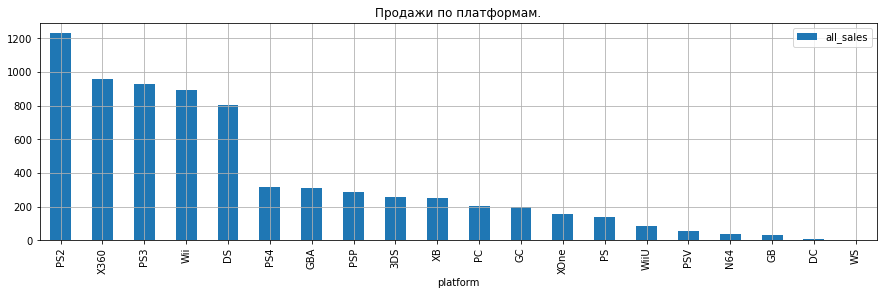

In [45]:
top_platforms.plot(kind='bar',figsize=(15, 4), grid=True).set_title('Продажи по платформам.');

Рассмотрим первые топ-5, как самые выделяющиеся. Проверим их на актуальность по годам:

In [46]:
df21_top = df21.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"')

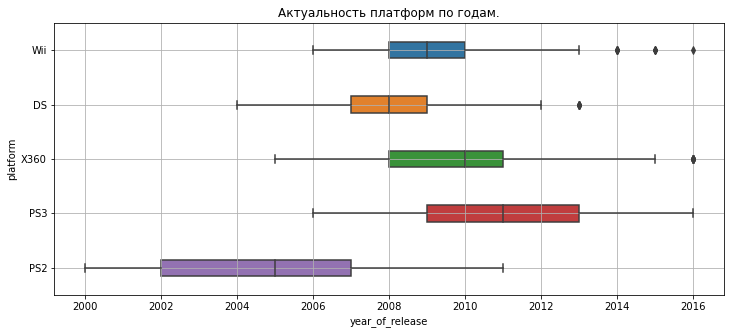

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
sns.boxplot(x="year_of_release", y="platform",
            data=df21_top, width=0.3).set_title('Актуальность платформ по годам.');  
plt.grid()

Судя по "усам", **средняя продолжительность актуальности консоли составляет 9-10 лет:**
- **PS2** с 2000 по 2010 (в точности 10 лет)
- **PS3** 2006 - 2016 (10 лет)
- **DS** с 2004 по 2013 (9 лет)
- **X360** с 2006 по 2015 (9 лет)
- **Wii** 2006 - 2015 (9 лет)

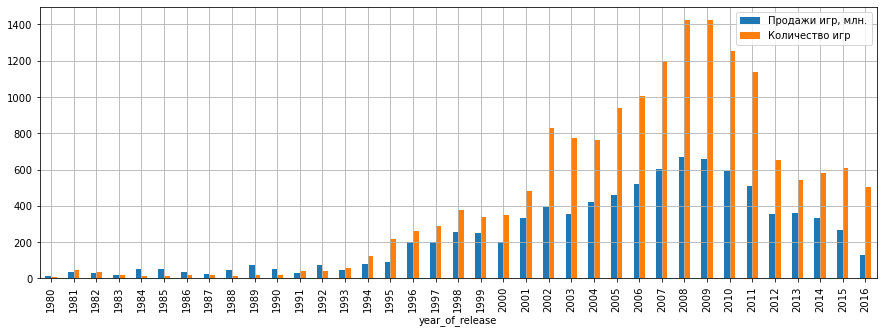

In [48]:
df1.plot.bar(figsize=(15,5), grid=True);

In [49]:
df1

,"Продажи игр, млн.",Количество игр
year_of_release,,
1980,11.38,9
1981,35.68,46
1982,28.88,36
1983,16.80,17
1984,50.35,14
1985,53.95,14
1986,37.08,21
1987,21.70,16
1988,47.21,15


На последнем графике отчетливо виден бурный рост и резкий спад продаж в период 2002-2001. Может, это золотой век видеоигр! В любом случае, именно начиная с 2012 года ситуация более менее устаканилась. 

Отталкиваясь от даты исследования (декабрь 2016 г.) и последних выводов, для построения прогноза на следующий год следует использовать только **данные, датированные 2012 годом и дальше.**

In [50]:
df=df.query('year_of_release >= 2012')

**Какие платформы лидируют по продажам, растут или падают?**

Посмотрим по годам.

In [51]:
pd.DataFrame(df.groupby([df.year_of_release, df.platform])['all_sales'].sum()).reset_index().sort_values(by=['year_of_release','all_sales'], ascending=False).head()

,year_of_release,platform,all_sales
43,2016,PS4,69.25
48,2016,XOne,26.15
40,2016,3DS,15.14
41,2016,PC,5.25
46,2016,WiiU,4.60


Визуализируем.

In [53]:
q = list(df.groupby('platform').agg({'all_sales':'sum'}).sort_values(by='all_sales').tail(10).index)
q

['DS', 'Wii', 'PSV', 'PC', 'WiiU', 'XOne', '3DS', 'X360', 'PS3', 'PS4']

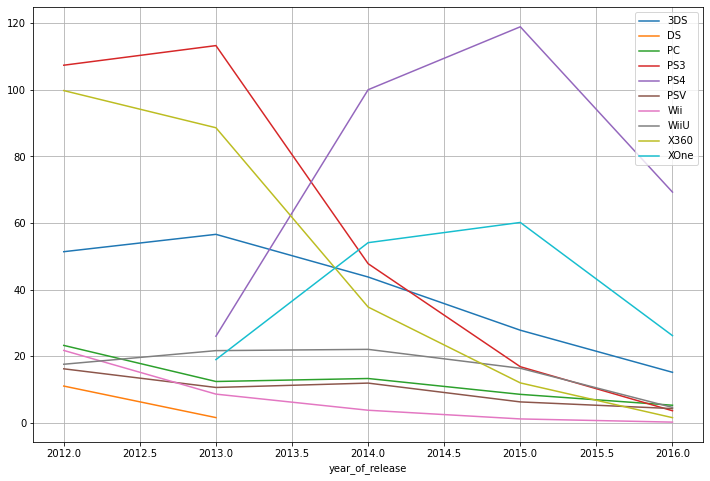

In [54]:
df.query('platform in @q').pivot_table(index='year_of_release', columns='platform', values='all_sales', 
                                       aggfunc='sum').plot(figsize=(12,8), grid=True)
plt.legend(loc='best')

Продажи идут на спад. Большинство платформ не превышают значения в 10 млн. продаж по всему миру. Однако три консоли - **PS4, XOne, и 3DS** - исключение. Они потенциально прибыльные.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по уже всем платформам.

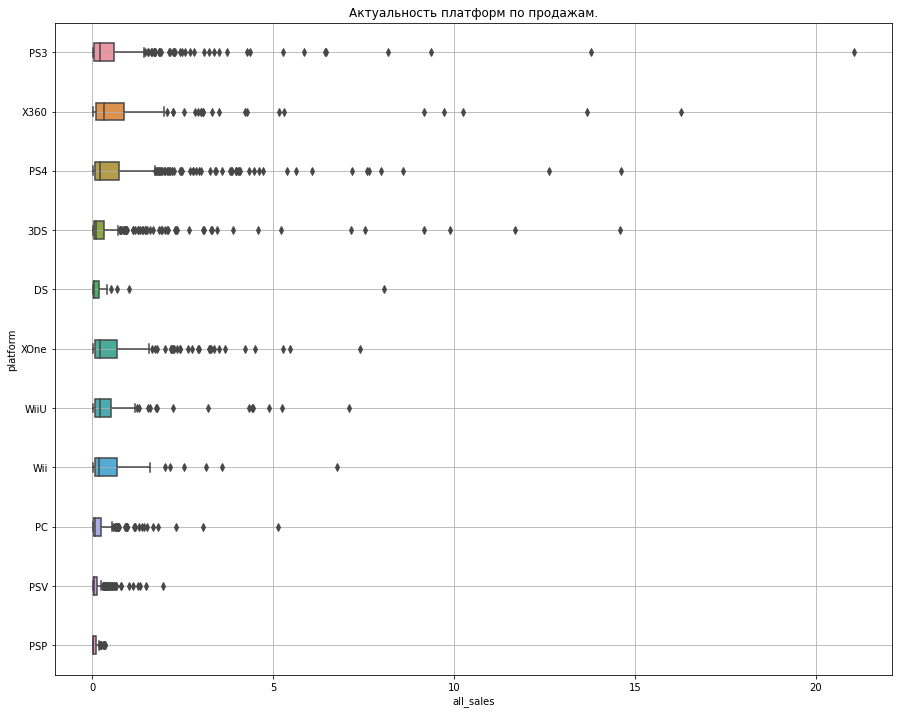

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.boxplot(x="all_sales", y="platform",
            data=df, width=0.3).set_title('Актуальность платформ по продажам.');
plt.grid()

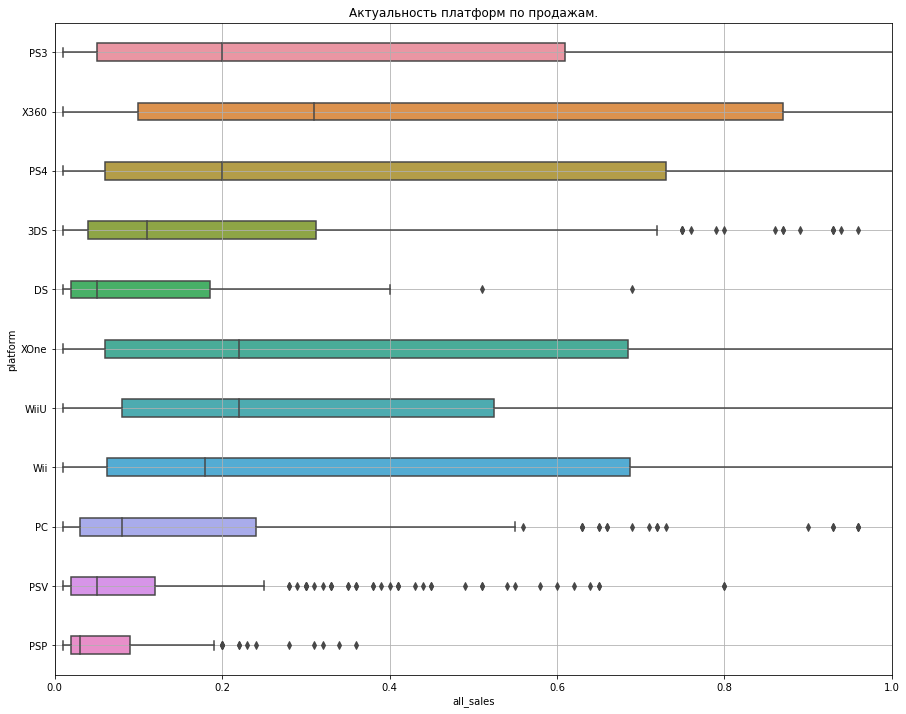

In [56]:
# Т.к. выбросы очень неудобным делают график, возьмем range до 1 млн. проданных копий
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.boxplot(x="all_sales", y="platform",
            data=df, width=0.3).set_title('Актуальность платформ по продажам.');
plt.xlim(0, 1) 
plt.grid()

- Самые большие медианные продажи - у Xbox360.  
- Размах "усов" показывает диапазон продаж игр. Лидеры по этому показателю - Xbox360, XboxOne, Wii, PS4, PS3. (одни переиздания Скайрима и ГТА 5 сколько продаж им сделали :D) 
- Выбросы - это игры с самыми большими продажами. Посмотрим на них:

In [57]:
df.query('all_sales > 10')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


Как я и думал! Знакомые всем тайтлы, которые залетают почти на все платформы. Тревор Филипс, Капитан Прайс, Пикачу - вот секрет успешной игры. :D

Интереса ради посмотрим на доли платформ в уходящем году.

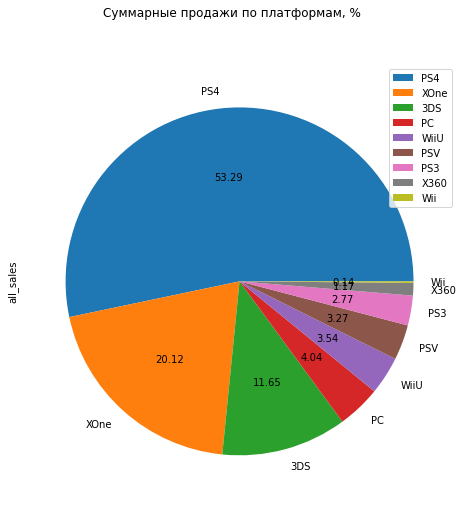

In [58]:
df.query('year_of_release == 2016').pivot_table(index='platform',
               values='all_sales', aggfunc='sum').sort_values(by='all_sales',
                                                              ascending=False).plot(kind='pie',
                                                                                    subplots=True, figsize=(8, 8), autopct='%.2f', legend=True, title='Суммарные продажи по платформам, %');

На три самых популярных платформ в 2016 году приходится 85% (!) продаж. Эх, монополия.

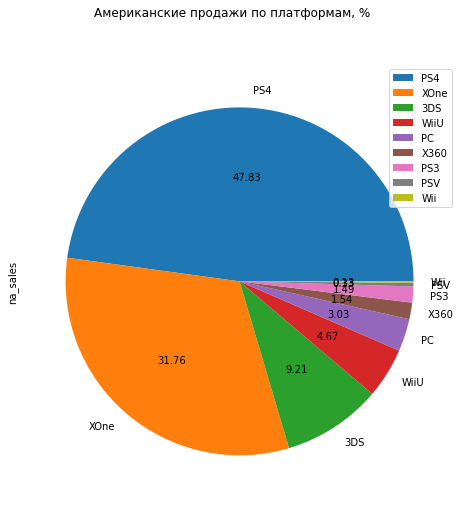

In [59]:
df.query('year_of_release == 2016').pivot_table(index='platform',
               values='na_sales', aggfunc='sum').sort_values(by='na_sales',
                                                              ascending=False).plot(kind='pie',
                                                                                    subplots=True, figsize=(8, 8), autopct='%.2f', legend=True, title='Американские продажи по платформам, %');

Американские продажи визаульно отражают мировые.

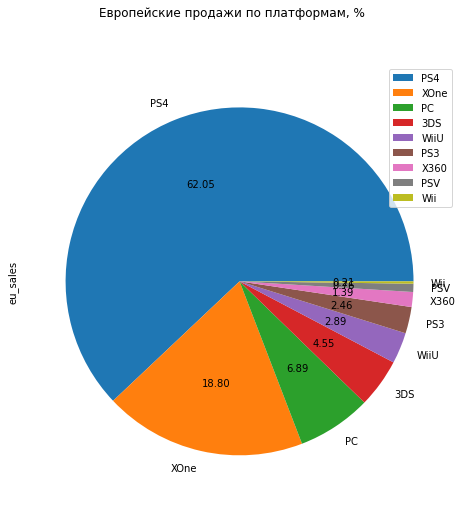

In [60]:
df.query('year_of_release == 2016').pivot_table(index='platform',
               values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',
                                                              ascending=False).plot(kind='pie',
                                                                                    subplots=True, figsize=(8, 8), autopct='%.2f', legend=True, title='Европейские продажи по платформам, %');

В Европе очень популярен PS4, а PC - обгоняет 3DS!

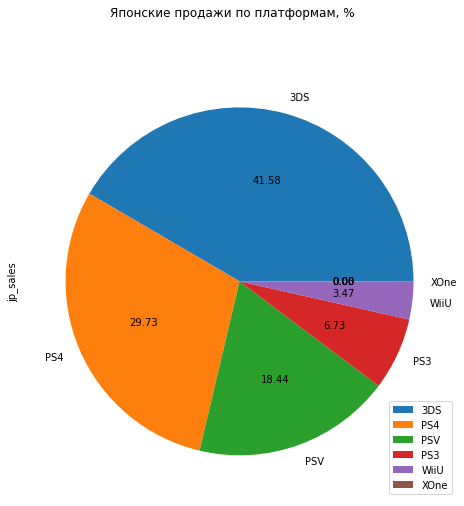

In [61]:
df.query('year_of_release == 2016').pivot_table(index='platform',
               values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',
                                                              ascending=False).plot(kind='pie',
                                                                                    subplots=True, figsize=(8, 8), autopct='%.2f', legend=True, title='Японские продажи по платформам, %');

Японцы не были бы японцами, если бы не выделялись. 3DS, PS4, PSV - занимают 90 % рынка игр.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?**

Рассмотрим на примере Xbox One:

In [62]:
df.query('platform=="XOne"')[['all_sales', 'critic_score', 'user_score']].corr(method='pearson')

,all_sales,critic_score,user_score
all_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


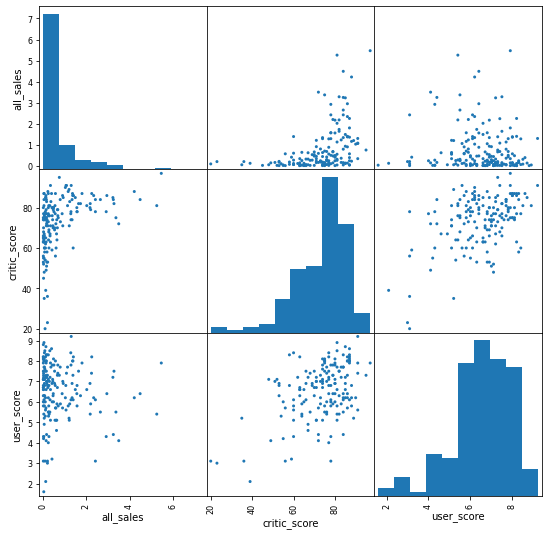

In [63]:
pd.plotting.scatter_matrix(df.query('platform=="XOne"')[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), alpha=1);

У колонки с оценками критиков **critic_score** и продажами наблюдается небольшая корреляционная связь (~0.42), а на самом графике уже заметен вывод: видеоигры с наибольшими имеют высокие (более 70%) оценки. 

Со столбцом оценок пользователей все не так однозначно: корреляция, близкая к нулю. Визуально диаграммы рассеивания похожи, но у **user_score** значения с бОльшими продажами рассеяны на графике в более хаотичном порядке.

Очевидно, оценки журналистов имеют бОльший вес на продажи игр на XboxOne по сравнению с пользовательскими.

Сравним корреляции с другими топами: **PS4, PC, WiiU** и **3DS**

In [64]:
df.query('platform=="PS4"')[['all_sales', 'critic_score', 'user_score']].corr(method='pearson')

,all_sales,critic_score,user_score
all_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [65]:
df.query('platform=="3DS"')[['all_sales', 'critic_score', 'user_score']].corr(method='pearson')

,all_sales,critic_score,user_score
all_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


In [66]:
df.query('platform=="WiiU"')[['all_sales', 'critic_score', 'user_score']].corr(method='pearson')

,all_sales,critic_score,user_score
all_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


In [67]:
df.query('platform=="PC"')[['all_sales', 'critic_score', 'user_score']].corr(method='pearson')

,all_sales,critic_score,user_score
all_sales,1.000000,0.237243,-0.121867
critic_score,0.237243,1.000000,0.432587
user_score,-0.121867,0.432587,1.000000


Интересно. Корреляции у PS4 и XboxOne почти совпадают. Возможно, целевые аудитории - идентичные или похожи друг на друга по поведению.  

Особняком так же стоит пара **WiiU** и **3DS** - у них похожие корреляционные значения, однако оценки пользователей тут выше - 0.22 и 0.4 соотвественно, а, значит, связь более прочная. Вероятно, игроки этих платформ более ответственно подходят к своей критике.  

у персональных же компьютеров все менее гладко. Практически нулевая зависимость продаж от оценок пользователей, и всего 0.29 - от критики профессионалов.

**Общее распределение игр по жанрам.**

Рассмотрим самые "продаваемые" жанры.

Суммарные продажи по жанрам:

In [68]:
df.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).style.bar()

,all_sales
genre,
Action,441.120000
Shooter,304.730000
Role-Playing,192.800000
Sports,181.070000
Misc,85.040000
Platform,61.000000
Racing,53.500000
Fighting,44.490000
Simulation,35.120000


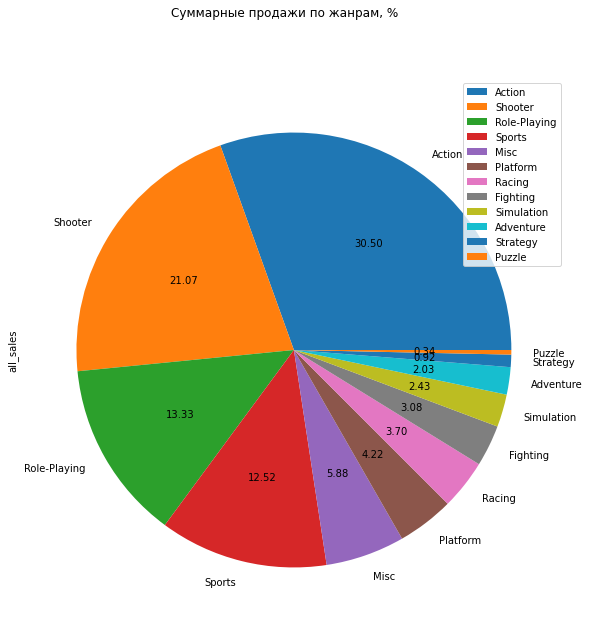

In [69]:
df.pivot_table(index='genre',
               values='all_sales', aggfunc='sum').sort_values(by='all_sales',
                                                              ascending=False).plot(kind='pie',
                                                                                    subplots=True, figsize=(10, 10), autopct='%.2f', legend=True, title='Суммарные продажи по жанрам, %');

Сразу очевидно, что три самых продаваемых жанра, на которые приходится более половины рынка видеоигр: 
- **экшены**
- **шутеры**
- **спортивные игры**

В аутсайдерах:
- **стратегии**
- **паззлы**
- **приключенческие игры**
- **симуляторы**
- **платформеры**
- **гоночные игры**  

(все вместе они собирают почти столько же продаж, сколько один лишь экшен)

In [70]:
df.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by='all_sales', ascending=False).style.bar()

,all_sales
genre,
Shooter,0.440000
Sports,0.240000
Platform,0.210000
Role-Playing,0.140000
Racing,0.140000
Fighting,0.130000
Action,0.120000
Misc,0.120000
Simulation,0.120000


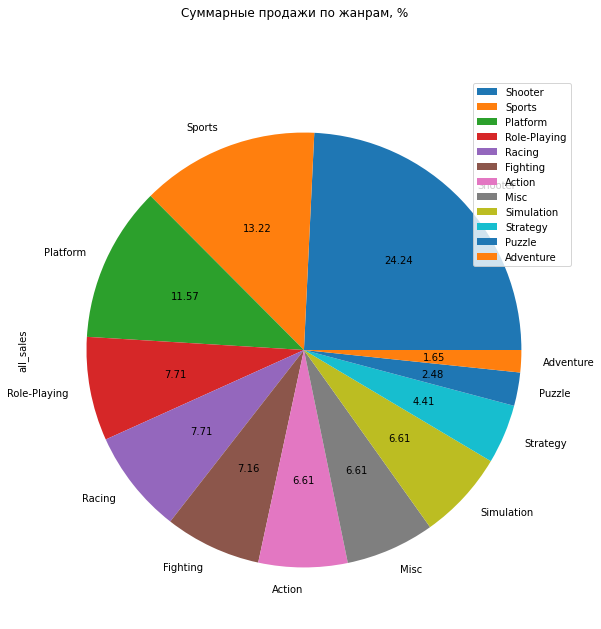

In [71]:
df.pivot_table(index='genre',
               values='all_sales', aggfunc='median').sort_values(by='all_sales',
                                                              ascending=False).plot(kind='pie',
                                                                                    subplots=True, figsize=(10, 10), autopct='%.2f', legend=True, title='Суммарные продажи по жанрам, %');

Данные по средним и суммарным продажам отличаются. 

Шутеры популярнее всего - в среднем каждая четвертая продаваемая игра в жанре шутер. Вместе со спортивными играми и платформерами они формируют половину среднестатистических продаж.

Хваленный экшен - занимает лишь 7 строчку в этом топе. Видимо, и правда: берут большие объемы продаж только числом!

## 4. Портрет пользователя каждого региона

**Самые популярные платформы (топ-5)**

Северная Америка

In [72]:
df.pivot_table(index='platform',
                    values='na_sales', aggfunc='sum').sort_values(by='na_sales',
                                                                  ascending=False).head().style.bar()

,na_sales
platform,
X360,140.050000
PS4,108.740000
PS3,103.380000
XOne,93.120000
3DS,55.310000


Европа

In [73]:
df.pivot_table(index='platform',
                    values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',
                                                                  ascending=False).head().style.bar()

,eu_sales
platform,
PS4,141.090000
PS3,106.860000
X360,74.520000
XOne,51.590000
3DS,42.640000


Япония

In [74]:
df.pivot_table(index='platform',
                    values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',
                                                                  ascending=False).head().style.bar()

,jp_sales
platform,
3DS,87.790000
PS3,35.290000
PSV,21.040000
PS4,15.960000
WiiU,13.010000


Интересно, что Европа и Северная Америка примерно совпадают по популярности консолей (лишь за разницей лидеров: PS3 в Европе, и Xbox360 в Америке, родной для США консоли). Можно было бы сказать, что игроки обеих регионов коррелируют по выбору платформ.

Однако в Японии очень специфичная ситуация: топ-5 составлен из консолей только японского же происхождения (Nintendo и Sony). И этот выбор никак не похож западных игроков. 

**Самые популярные жанры (топ-5).**

Северная Америка

In [75]:
df.pivot_table(index='genre',
                    values='na_sales', aggfunc='sum').sort_values(by='na_sales',
                                                                  ascending=False).head().style.bar()

,na_sales
genre,
Action,177.840000
Shooter,144.770000
Sports,81.530000
Role-Playing,64.000000
Misc,38.190000


Европа

In [76]:
df.pivot_table(index='genre',
                    values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',
                                                                  ascending=False).head().style.bar()

,eu_sales
genre,
Action,159.340000
Shooter,113.470000
Sports,69.090000
Role-Playing,48.530000
Racing,27.290000


Япония.

In [77]:
df.pivot_table(index='genre',
                    values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',
                                                                  ascending=False).head().style.bar()

,jp_sales
genre,
Role-Playing,65.440000
Action,52.800000
Misc,12.860000
Simulation,10.410000
Fighting,9.440000


Вывод вышеуказанных сводных таблиц немного похож на предыдущий: продажи по жанрам в Америке и Европе практически идентичны, в то время, как в Стране Восходящего Солнца отчетливый лидер - ролевые игры и тот же экшен. Скорее всего, отображается страстная любовь японцам к жанру JRPG - тоже локального самородка. 

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Напомним:

- «E» («Everyone») — «Для всех»: Игра подходит для лиц от 6 лет
- «T» («Teen») — «Подросткам»: от 13 лет
- «M» («Mature») — «Для взрослых»: от 17 лет
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»: до 3 лет
- "K-A" ("Kids to Adults"): первоначальная версия «E»
- «RP» («Rating Pending») — «Рейтинг ожидается». Для еще невыпущенных проектов.
- «AO» («Adults Only 18+») — «Только для взрослых старше 18 лет»

In [78]:
df.rating.value_counts()

M       498
T       412
E       395
E10+    306
Name: rating, dtype: int64

In [80]:
df2 = df.copy()
df2['rating'] = df2['rating'].fillna('no_rating')
df2.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02
no_rating,103.31,91.50,108.84


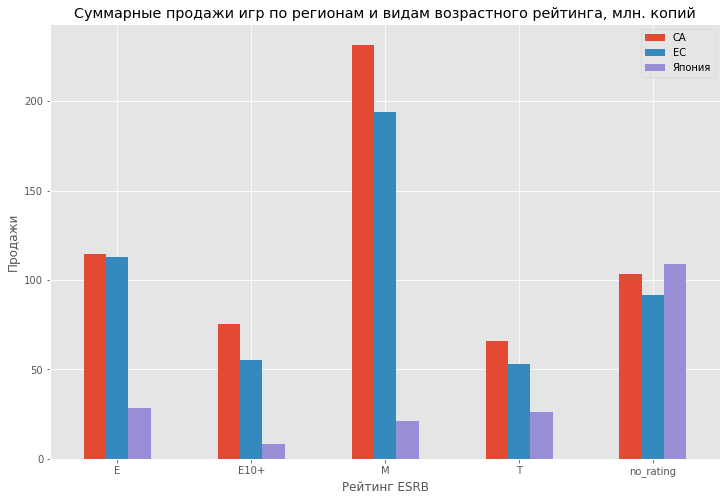

In [96]:
plt.style.use('ggplot')
ax = df2.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot.bar(figsize=(12,8))
ax.grid(True)
ax.legend(['СА', 'EC', 'Япония'])
ax.set(ylabel='Продажи', xlabel='Рейтинг ESRB', title='Суммарные продажи игр по регионам и видам возрастного рейтинга, млн. копий')
plt.xticks(rotation=360);

Вывод: 

В СА и Европе примерно одинаковые соотношения, где лидеры продаж - игры для тех кто постарше (с рейтингом **М** и **Т**).

Япония же снова выделяется - самые продаваемые игры имеют рейтинг **Е** (6+).

Предпологаю, что рейтинг ESRB имеет большое влияние на японских игроков, чего нельзя сказать с уверенностью о западных.

## 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**


- **H0  — «cредние пользовательские рейтинги платформ Xbox One и PC одинаковые».**
- **H1  — «cредние пользовательские рейтинги платформ Xbox One и PC отличаются».**

Гипотеза - двухсторонняя. Уровень значимости, или альфу, возьмем равной **5%.**

In [89]:
xone = df.query('platform == "XOne" & user_score > 0')['user_score'] 
pc = df.query('platform == "PC" & user_score > 0')['user_score']

alpha = 0.05

results = st.ttest_ind(xone, pc)  

print('p-значение: ', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**55%** - вероятность того, что пользовательские рейтинги платформ Xbox One и PC будут совпадать. **Гипотезу не получилось отвергнуть.**

Посмотрим теперь на значения нашей выборки своими глазами.

Дисперсия по оценкам игр на PC равна: 2.77
Дисперсия по оценкам игр на Xbox One равна: 1.907
Разница составляет: 0.312 %
---------------------------------------------------
Стандартное отклонение по оценкам игр на PC равна: 1.664
Стандартное отклонение по оценкам игр на Xbox One равна: 1.381
Разница составляет: 0.17 %
---------------------------------------------------
Средняя оценка игр на PC равна: 6.429
Средняя оценка игр на Xbox One равна: 6.521
Разница составляет: -0.014 %


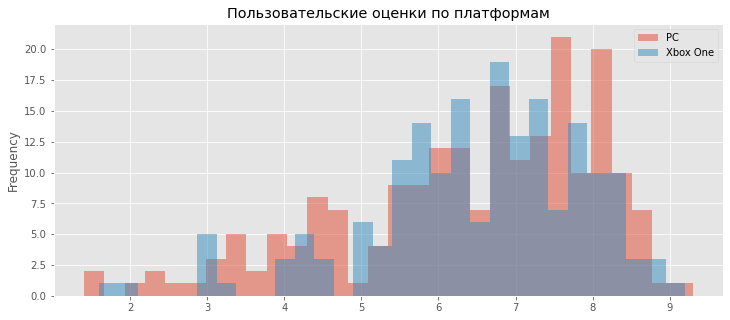

In [90]:
pc.plot(kind='hist', alpha=0.5, bins=30, grid=True, figsize=(12, 5), 
    title='Пользовательские оценки по платформам', legend=True, label='PC');
xone.plot(kind='hist', alpha=0.5, bins=30, grid=True, figsize=(12, 5), 
    title='Пользовательские оценки по платформам', legend=True, label='Xbox One');
print('Дисперсия по оценкам игр на PC равна:', round(pc.var(), 3))
print('Дисперсия по оценкам игр на Xbox One равна:', round(xone.var(), 3))
print('Разница составляет:', round((pc.var()-xone.var())/pc.var(), 3), '%')
print('---------------------------------------------------')
print('Стандартное отклонение по оценкам игр на PC равна:', round(pc.std(), 3))
print('Стандартное отклонение по оценкам игр на Xbox One равна:', round(xone.std(), 3))
print('Разница составляет:', round((pc.std()-xone.std())/pc.std(), 3), '%')
print('---------------------------------------------------')
print('Средняя оценка игр на PC равна:', round(pc.mean(), 3))
print('Средняя оценка игр на Xbox One равна:', round(xone.mean(), 3))
print('Разница составляет:', round((pc.mean()-xone.mean())/pc.mean(), 3), '%')

На графике наблюдается общая корреляция. У ПК больше низкокооцененных релизов, чем у XboxOne - это может быть следствием малого количества оставшихся данных. Однако общая средняя оценка на обоих платформах практически совпадает: **6.4** у **PC, 6.5** у **XboxOne** соотвественно.

### Средние пользовательские рейтинги жанров Action и Sports разные.

- **H0  — «cредние пользовательские рейтинги жанров Action и Sports одинаковые».**
- **H1  — «cредние пользовательские рейтинги жанров Action и Sports отличаются».**

Альфу по аналогии берем 5%.

In [91]:
action = df.query('genre == "Action" & user_score > 0')['user_score'] 
sports = df.query('genre == "Sports" & user_score > 0')['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports)  

print('p-значение: ', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


-26-ая степень! Настолько мала вероятность нулевой гипотезы, гласящая, что cредние пользовательские рейтинги жанров Action и Sports одинаковые. 

Значит, **с вероятностью 99.9%** можно утверждать, что задаваемая **гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" - верна** (при условии репрезентативности нашей выборки).

Взглянем же на визуально на наши данные:

Дисперсия по оценкам игр в жанре Action равна: 1.889
Дисперсия по оценкам игр в жанре Sports равна: 3.023
Разница составляет: 0.375 %
---------------------------------------------------
Стандартное отклонение по оценкам игр в жанре Action равна: 1.374
Стандартное отклонение по оценкам игр в жанре Sports равна: 1.739
Разница составляет: 0.209 %
---------------------------------------------------
Средняя оценка игр в жанре Action равна: 6.825
Средняя оценка игр в жанре Sports равна: 5.456
Разница составляет: 0.201 %


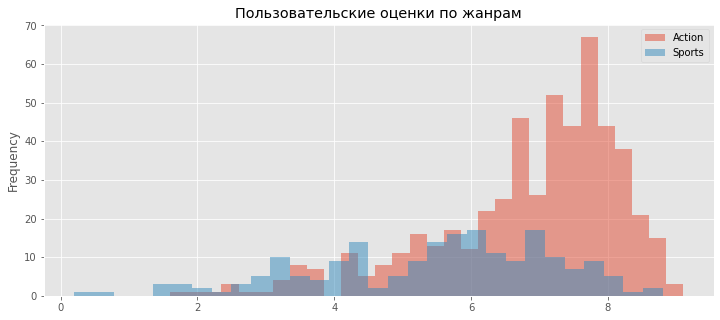

In [92]:
action.plot(kind='hist', alpha=0.5, bins=30, grid=True, figsize=(12, 5), 
    title='Пользовательские оценки по жанрам', legend=True, label='Action');
sports.plot(kind='hist', alpha=0.5, bins=30, grid=True, figsize=(12, 5), 
    title='Пользовательские оценки по жанрам', legend=True, label='Sports');
print('Дисперсия по оценкам игр в жанре Action равна:', round(action.var(), 3))
print('Дисперсия по оценкам игр в жанре Sports равна:', round(sports.var(), 3))
print('Разница составляет:', round((sports.var()-action.var())/sports.var(), 3), '%')
print('---------------------------------------------------')
print('Стандартное отклонение по оценкам игр в жанре Action равна:', round(action.std(), 3))
print('Стандартное отклонение по оценкам игр в жанре Sports равна:', round(sports.std(), 3))
print('Разница составляет:', round((sports.std()-action.std())/sports.std(), 3), '%')
print('---------------------------------------------------')
print('Средняя оценка игр в жанре Action равна:', round(action.mean(), 3))
print('Средняя оценка игр в жанре Sports равна:', round(sports.mean(), 3))
print('Разница составляет:', round((action.mean()-sports.mean())/action.mean(), 3), '%')

Визуально и математически разброс различается - отличия существенные, о чем так же говорит разница дисперсий на 38 %.
Средние оценки различаются на 20 %: у жанра **action** средняя оценка - 6.825 балла, у жанра **sports** - 5.425 балла. Спортивные игры в среднем хуже по качеству в последние 5 лет :(

## 6. Вывод

Напомню: на дворе - декабрь 2016, мы формируем рекламные кампании на грядущий новый год, на основе анализа датасета с данными по продажам и оценкам 11.5 тыс. игр.

Основные пункты, которые мы имеем после анализа:
- Резкий рост видеоигр начался с 2000 года, но значения пошли вниз после 2008 года.
- Значения для анализа имеют данные, взятые начиная с 2012 года
- Средняя актуальность платформы составляет 9-10 лет
- Лишь для трех консолей в уходящем году продажи превысыли 10 млн. продаж игр - PS4, XOne, и 3DS. Их доля вместе среди всех платформ только в 2016 составила 85%. Именно на эти платформы и необходимо делать основную ставку в Америке, в Европе - еще на ПК. В Японии - на 3DS, PS4, PSV.
- Продажи по жанрам тоже отличаются по регионам. Для Европы и Америки самые успешные игры -  прежде всего экшены, шутеры, спортивные игры. В Японии - ролевые игры и экшены.
- При формировании рекламной кампании смысл опираться на рейтинг ESRB есть только в Японии: там преимущество берут игры с общедоступным рейтингом.
- Гипотезу о том, что "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не удалось опровергнуть.
- Гипотеза о том, что "средние пользовательские рейтинги жанров Action и Sports разные" - подтвердилась с вероятностью 99.9% (при условии репрезентативности нашей выборки).
- В целом, портреты европейских и американских игроков больше похожи друг на друга, чем на японский.